# Multiple Linear Regression

In [13]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [2]:
Boston =load_data('boston')
Boston.columns #columns are known as the predictors: 13

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [4]:
X = MS(['lstat', 'age']).fit_transform(Boston)
y = Boston['medv']
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [5]:
terms = Boston.columns.drop('medv')

In [6]:
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [8]:
X =MS(terms).fit_transform(Boston)
y = Boston['lstat']
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,-2.898000e-14,3.200000e-13,-9.100000e-02,0.928
crim,6.744000e-17,2.140000e-15,3.200000e-02,0.975
zn,1.691000e-16,8.980000e-16,1.880000e-01,0.851
indus,5.574000e-16,4.020000e-15,1.390000e-01,0.890
chas,-2.776000e-15,5.630000e-14,-4.900000e-02,0.961
nox,-2.776000e-16,2.490000e-13,-1.000000e-03,0.999
rm,4.580000e-15,2.720000e-14,1.680000e-01,0.866
age,-3.725000e-16,8.630000e-16,-4.320000e-01,0.666
dis,1.006000e-16,1.310000e-14,8.000000e-03,0.994
rad,-1.639000e-16,4.330000e-15,-3.800000e-02,0.970


In [9]:
minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,4.885000e-15,1.130000e-13,4.300000e-02,0.965
crim,1.290000e-16,7.550000e-16,1.710000e-01,0.864
zn,-2.819000e-18,3.150000e-16,-9.000000e-03,0.993
indus,-2.990000e-16,1.420000e-15,-2.100000e-01,0.834
chas,3.747000e-15,1.990000e-14,1.890000e-01,0.851
nox,6.772000e-15,8.500000e-14,8.000000e-02,0.937
rm,1.049000e-15,9.420000e-15,1.110000e-01,0.911
dis,7.251000e-16,4.410000e-15,1.640000e-01,0.869
rad,-3.920000e-16,1.530000e-15,-2.570000e-01,0.797
tax,2.671000e-16,8.690000e-17,3.073000e+00,0.002


In [12]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif': vals}, index = X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


### Interaction Terms
It is easy to include interaction terms in a linear model using ModelSpec().
Including a tuple ("lstat","age") tells the model matrix builder to include
an interaction term between lstat and age.

In [14]:
X = MS(['lstat','age', ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,-8.640000e-14,2.460000e-14,-3.511000e+00,0.000
lstat,1.000000e+00,2.800000e-15,3.570000e+14,0.000
age,-1.026000e-15,3.330000e-16,-3.081000e+00,0.002
lstat:age,1.192000e-16,3.100000e-17,3.845000e+00,0.000


### Non-linear Transformations of the Predictors

In [22]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
y = Boston['medv']
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [23]:
anova_lm(results1 , results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,4.755296e-23,0.0,NaN,NaN,NaN
1,502.0,1.416561e+04,-9.0,-14165.613251,55.777778,NaN


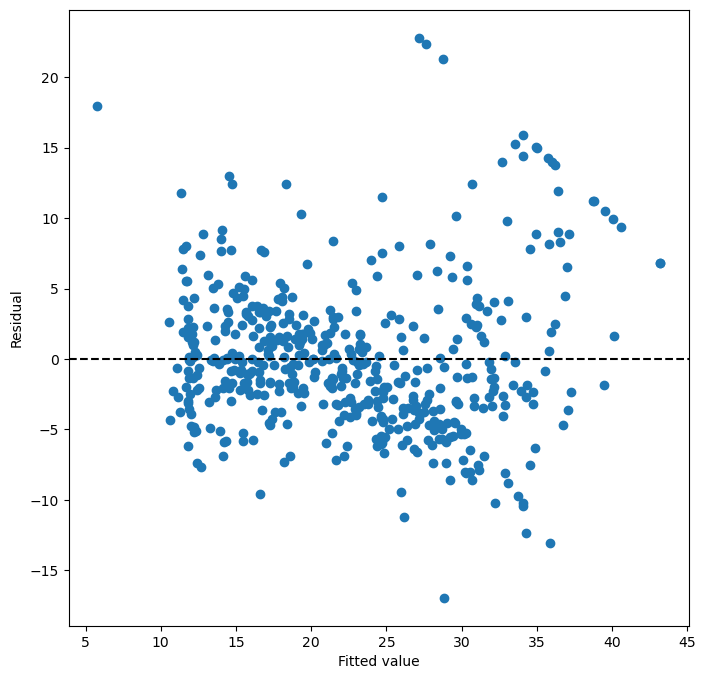

In [25]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues , results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### Qualitative Predictors

In [27]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [28]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288
